 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index()
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp_500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_500_history = sp_500_history.sort_index(ascending=True)
sp_500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp_500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types 1/2
sp_500_history["Close"] = sp_500_history["Close"].str.replace("$", "")
sp_500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Fix Data Types 2/2
sp_500_history["Close"] = pd.to_numeric(sp_500_history["Close"])
sp_500_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_returns = sp_500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename Column
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
grouped_daily_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
grouped_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

['2015-03-03', '2019-05-01', -0.15, 0.1]

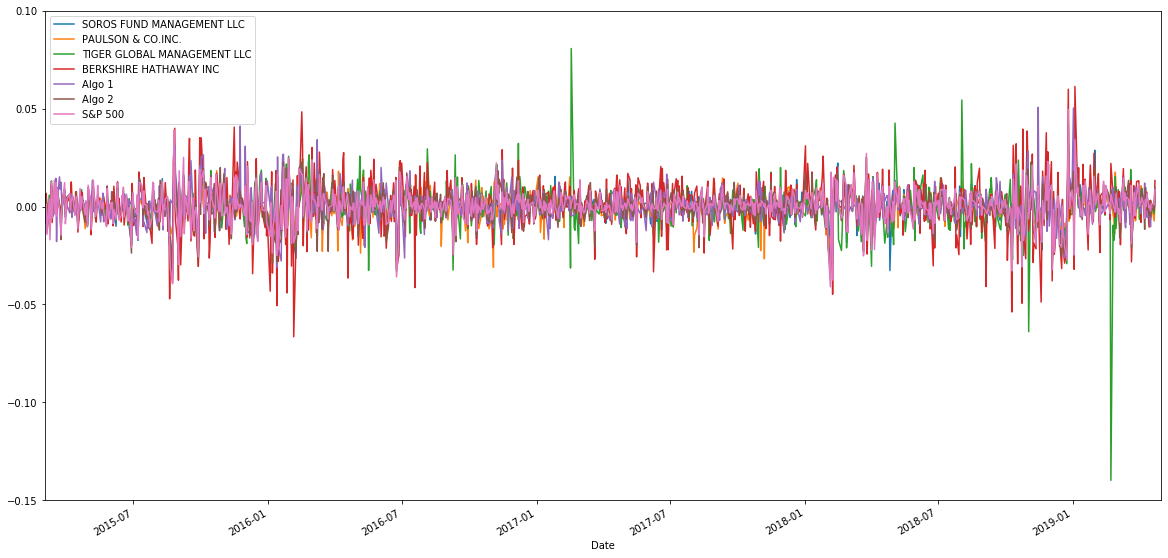

In [17]:
# Plot daily returns
ax = grouped_daily_returns.plot(figsize=(20,10))
ax.axis(["2015-03-03", "2019-05-01", -0.15, 0.10])

In [18]:
# Calculate cumulative returns
grouped_data_cumulative = (1+grouped_daily_returns).cumprod()
grouped_data_cumulative

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986


['2015-03-03', '2019-05-01', 0.6, 2.0]

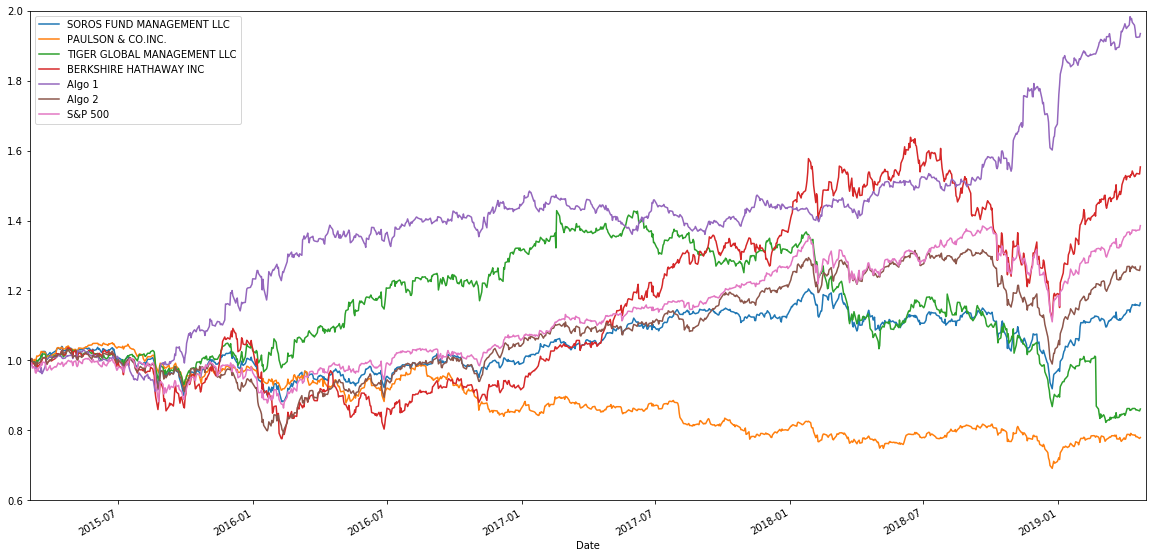

In [19]:
# Plot cumulative returns
ax = grouped_data_cumulative.plot(figsize=(20,10))
ax.axis(["2015-03-03", "2019-05-01", 0.6, 2.0])



## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

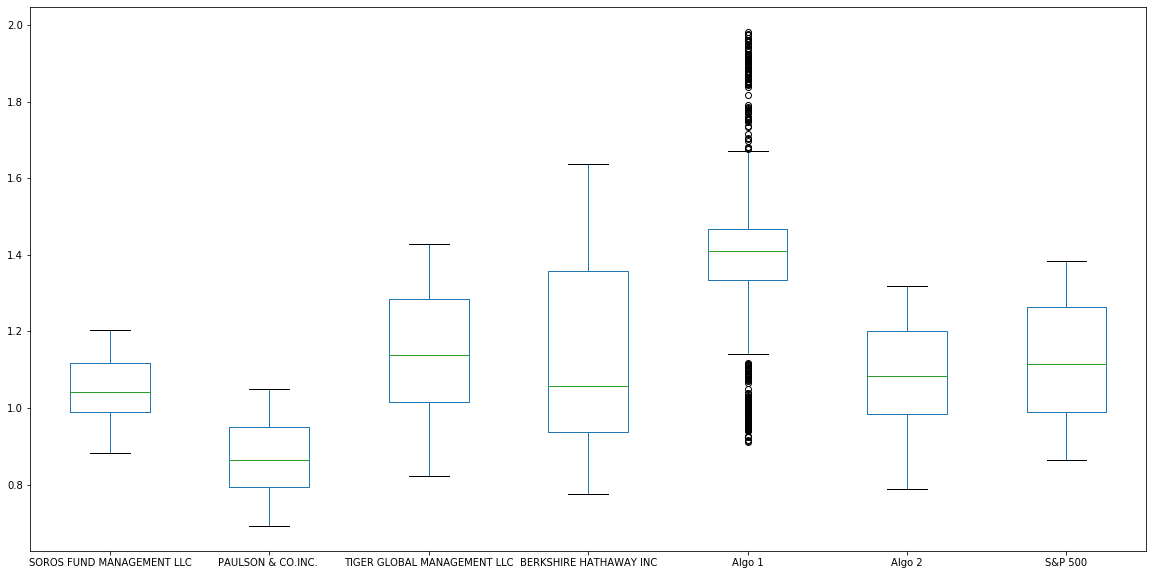

In [20]:
# Box plot to visually show risk
grouped_data_cumulative.plot(kind="box", figsize=(20,10))

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
grouped_data_std = grouped_daily_returns.std()
grouped_data_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

#### Which portfolios are riskier than the S&P 500?
The following portfolios are riskier than the S&P500: (i) Tiger Global Management Inc. and (ii) Berkshire Hathaway Inc.

In [22]:
# Determine which portfolios are riskier than the S&P 500



In [23]:
# Calculate the annualized standard deviation (252 trading days)
grouped_data_std_annual = grouped_data_std * np.sqrt(252)
grouped_data_std_annual

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

['2015-03-03', '2019-05-01', 0.0, 0.035]

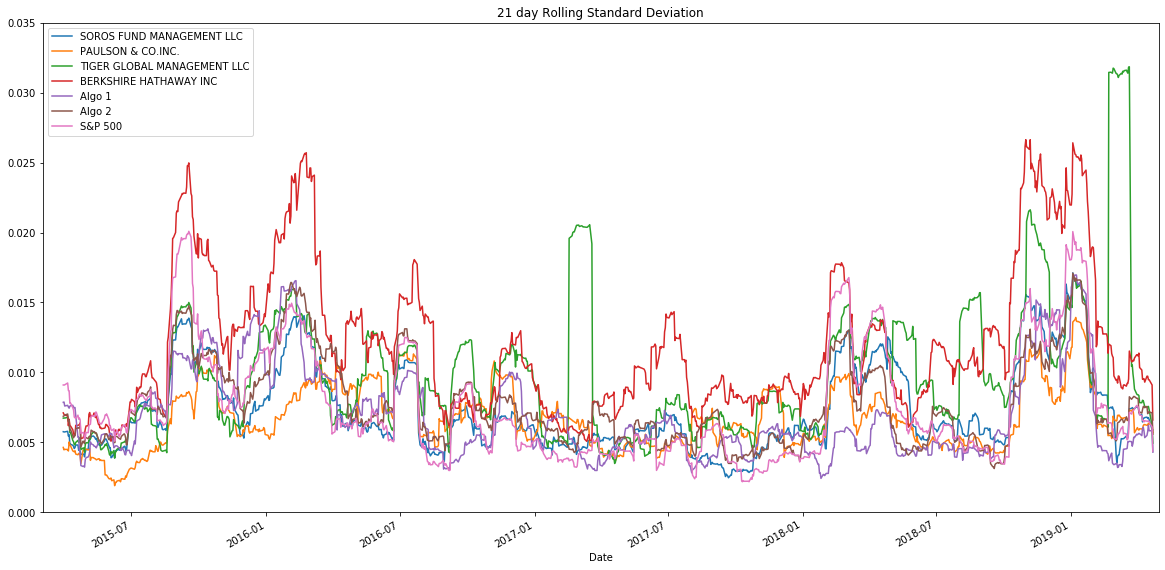

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
grouped_data_std_rolling = grouped_daily_returns.rolling(window=21).std()
ax = grouped_data_std_rolling.plot(figsize=(20,10),title = "21 day Rolling Standard Deviation")
ax.axis(["2015-03-03", "2019-05-01", 0.0, 0.035])

In [25]:
# Construct a correlation table
grouped_data_corr = grouped_daily_returns.corr()
grouped_data_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


5.65850319720364e-05
7.316632424648712e-05
The Beta for the Soros Fund Management portfolio is: 0.77


['2015-03-03', '2019-05-01', 0.0, 1.5]

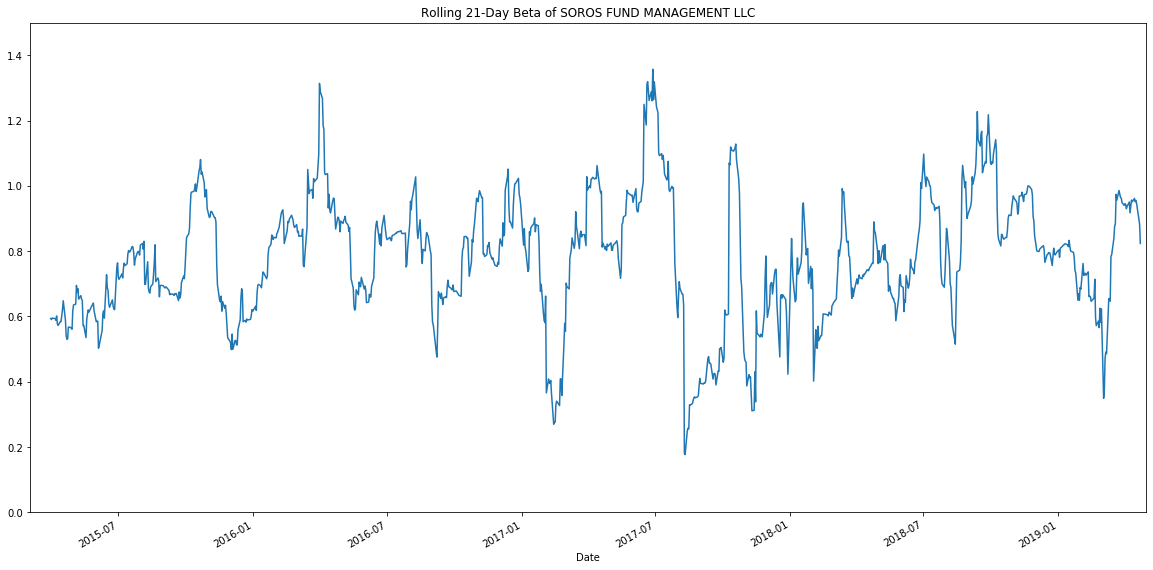

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# stock_beta = covariance / variance

#calculate covariance of stock and market
covariance = grouped_daily_returns['SOROS FUND MANAGEMENT LLC'].cov(grouped_daily_returns['S&P 500'])
print(covariance)
#Calculate the variance of Soros Fund Management
variance = grouped_daily_returns["S&P 500"].var()
print(variance)
# Calculate Beta for Soros Fund Management
beta = round(covariance/variance,2)
print(f"The Beta for the Soros Fund Management portfolio is: {beta}")

#Calculate rolling stats
rolling_covariance = grouped_daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(grouped_daily_returns['S&P 500'])
rolling_variance = grouped_daily_returns["S&P 500"].rolling(window=21).var()
rolling_beta = rolling_covariance/rolling_variance
ax = rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC')
ax.axis(["2015-03-03", "2019-05-01", 0.0, 1.5])

['2015-03-03', '2019-05-01', 0.0, 1.5]

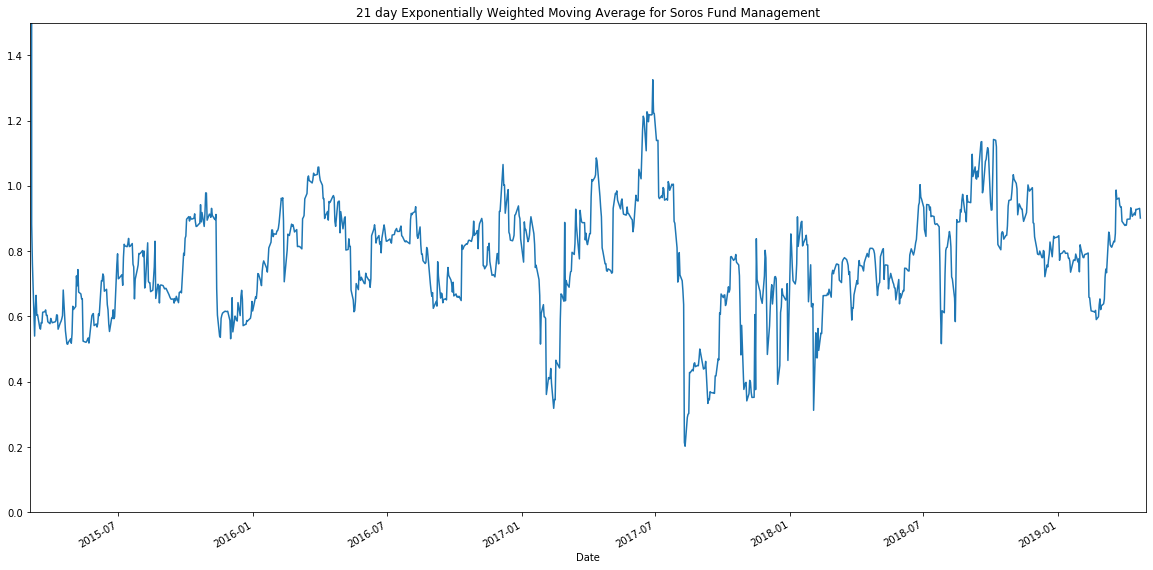

In [27]:
# Calculate a rolling window using the exponentially weighted moving average. 
covariance_ewm = grouped_daily_returns["SOROS FUND MANAGEMENT LLC"].ewm(span=21,adjust=False).cov(grouped_daily_returns["S&P 500"])
variance_ewm = grouped_daily_returns["S&P 500"].ewm(span=21, adjust=False).var()
beta_ewm = covariance_ewm/variance_ewm

beta_ewm
ax = beta_ewm.plot(figsize=(20,10), title="21 day Exponentially Weighted Moving Average for Soros Fund Management")
ax.axis(["2015-03-03", "2019-05-01", 0.0, 1.5])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [28]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (grouped_daily_returns.mean() * 252)/ (grouped_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

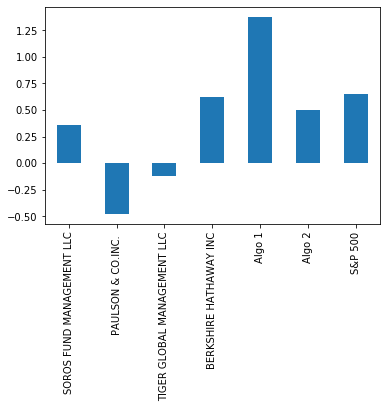

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

On the basis of the Sharpe ratio alone, only Algo 1 outperforms both 'the market' and the whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock: 3 stocks: ILMN, MKTX, AAPL
ILMN_filepath = Path("Resources/Illumina stock price.csv")
ILMN_data = pd.read_csv(ILMN_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
ILMN_data.head()

,Close
Date,
2017-06-26 16:00:00,180.89
2017-06-27 16:00:00,176.36
2017-06-28 16:00:00,181.00
2017-06-29 16:00:00,176.75
2017-06-30 16:00:00,173.52


In [31]:
# Read the second stock
MKTX_filepath = Path("Resources/Marketaxess stock price.csv")
MKTX_data = pd.read_csv(MKTX_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
MKTX_data.head()

,Close
Date,
2017-06-26 16:00:00,200.85
2017-06-27 16:00:00,197.64
2017-06-28 16:00:00,201.76
2017-06-29 16:00:00,203.52
2017-06-30 16:00:00,201.10


In [32]:
# Read the third stock
AAPL_filepath = Path("Resources/Apple stock price.csv")
AAPL_data = pd.read_csv(AAPL_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
AAPL_data.head()

,Close
Date,
2017-06-26 16:00:00,145.82
2017-06-27 16:00:00,143.73
2017-06-28 16:00:00,145.83
2017-06-29 16:00:00,143.68
2017-06-30 16:00:00,144.02


In [33]:
# Read the fourth stock
MA_filepath = Path("Resources/Mastercard stock price.csv")
MA_data = pd.read_csv(MA_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
MA_data.head()

,Close
Date,
2017-06-26 16:00:00,123.52
2017-06-27 16:00:00,122.74
2017-06-28 16:00:00,124.81
2017-06-29 16:00:00,121.51
2017-06-30 16:00:00,121.45


In [34]:
# Concatenate all stocks into a single DataFrame
portfolio_data = pd.concat([ILMN_data, MKTX_data, AAPL_data, MA_data], axis="columns", join="inner")
portfolio_data.columns = ["ILMN", "MKTX", "AAPL", "MA"]
portfolio_data.head()

,ILMN,MKTX,AAPL,MA
Date,,,,
2017-06-26 16:00:00,180.89,200.85,145.82,123.52
2017-06-27 16:00:00,176.36,197.64,143.73,122.74
2017-06-28 16:00:00,181.00,201.76,145.83,124.81
2017-06-29 16:00:00,176.75,203.52,143.68,121.51
2017-06-30 16:00:00,173.52,201.10,144.02,121.45


In [35]:
# Reset the index
portfolio_data.index.name = "Date"
portfolio_data.head()

,ILMN,MKTX,AAPL,MA
Date,,,,
2017-06-26 16:00:00,180.89,200.85,145.82,123.52
2017-06-27 16:00:00,176.36,197.64,143.73,122.74
2017-06-28 16:00:00,181.00,201.76,145.83,124.81
2017-06-29 16:00:00,176.75,203.52,143.68,121.51
2017-06-30 16:00:00,173.52,201.10,144.02,121.45


In [36]:
#Calculate daily returns
portfolio_daily_returns = portfolio_data.pct_change()
portfolio_daily_returns

,ILMN,MKTX,AAPL,MA
Date,,,,
2017-06-26 16:00:00,NaN,NaN,NaN,NaN
2017-06-27 16:00:00,-0.025043,-0.015982,-0.014333,-0.006315
2017-06-28 16:00:00,0.026310,0.020846,0.014611,0.016865
2017-06-29 16:00:00,-0.023481,0.008723,-0.014743,-0.026440
2017-06-30 16:00:00,-0.018274,-0.011891,0.002366,-0.000494
...,...,...,...,...
2020-06-19 16:00:00,0.016119,0.038773,-0.005715,-0.027391
2020-06-22 16:00:00,-0.022480,-0.002326,0.026164,0.026779
2020-06-23 16:00:00,0.018087,0.000867,0.021345,0.008015


In [37]:
# Drop Nulls
portfolio_daily_returns = portfolio_daily_returns.dropna()
portfolio_daily_returns.isnull().sum()

ILMN    0
MKTX    0
AAPL    0
MA      0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
total_portfolio_return = portfolio_daily_returns.dot(weights)
total_portfolio_return = total_portfolio_return.to_frame()
total_portfolio_return

,0
Date,
2017-06-27 16:00:00,-0.015418
2017-06-28 16:00:00,0.019658
2017-06-29 16:00:00,-0.013985
2017-06-30 16:00:00,-0.007073
2017-07-03 16:00:00,0.001444
...,...
2020-06-19 16:00:00,0.005447
2020-06-22 16:00:00,0.007034
2020-06-23 16:00:00,0.012078


In [39]:
total_portfolio_return.index = total_portfolio_return.index.normalize()
total_portfolio_return = total_portfolio_return.rename(columns={0: "Custom"})
total_portfolio_return

,Custom
Date,
2017-06-27,-0.015418
2017-06-28,0.019658
2017-06-29,-0.013985
2017-06-30,-0.007073
2017-07-03,0.001444
...,...
2020-06-19,0.005447
2020-06-22,0.007034
2020-06-23,0.012078


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
grouped_daily_returns_new = pd.concat([whale_returns, algo_returns, sp500_returns, total_portfolio_return], axis="columns", join="inner")
grouped_daily_returns_new.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.002058
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.003042
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.002662
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001415
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.006738


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
grouped_daily_returns_new.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [42]:
# Risk
grouped_daily_returns_new_risk = grouped_daily_returns_new.std()
grouped_daily_returns_new_risk

SOROS FUND MANAGEMENT LLC      0.008413
PAULSON & CO.INC.              0.007110
TIGER GLOBAL MANAGEMENT LLC    0.012391
BERKSHIRE HATHAWAY INC         0.013323
Algo 1                         0.007014
Algo 2                         0.007985
S&P 500                        0.008884
Custom                         0.012464
dtype: float64

['2017-07-26', '2019-04-23', 0, 0.035]

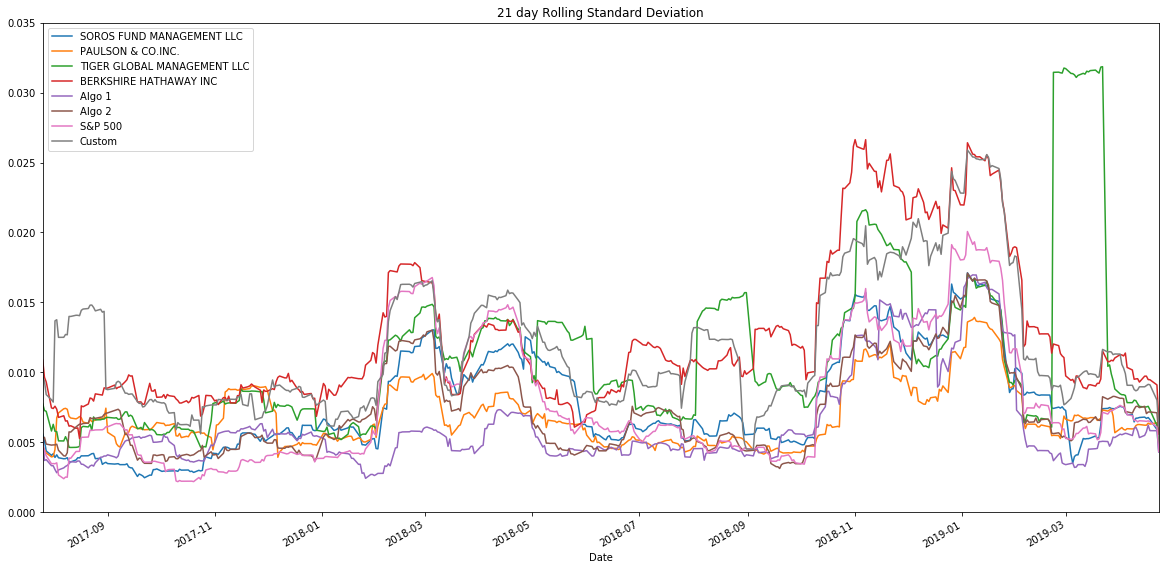

In [43]:
# Rolling
grouped_daily_returns_new_risk_roll = grouped_daily_returns_new.rolling(window=21).std()
grouped_daily_returns_new_risk_roll = grouped_daily_returns_new_risk_roll.dropna()
grouped_daily_returns_new_risk_roll.head()
ax = grouped_daily_returns_new_risk_roll.plot(figsize=(20,10),title = "21 day Rolling Standard Deviation")
ax.axis(["2017-07-26","2019-04-23", 0, 0.035])

In [44]:
# Annualized Sharpe Ratios
sharpe_ratios_new = (grouped_daily_returns_new.mean() * 252)/ (grouped_daily_returns_new.std() * np.sqrt(252))
sharpe_ratios_new

SOROS FUND MANAGEMENT LLC      0.305078
PAULSON & CO.INC.             -0.520924
TIGER GLOBAL MANAGEMENT LLC   -1.198204
BERKSHIRE HATHAWAY INC         0.727929
Algo 1                         1.556239
Algo 2                         0.656174
S&P 500                        0.791081
Custom                         1.490652
dtype: float64

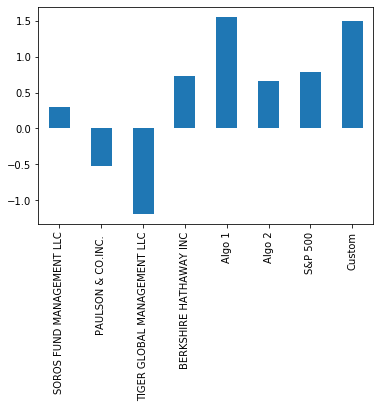

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar")

In [46]:
# Create a correlation analysis
grouped_daily_returns_new.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.719940,0.513376,0.770165,0.296069,0.806472,0.823363,0.691552
PAULSON & CO.INC.,0.719940,1.000000,0.473434,0.589580,0.307525,0.739055,0.719719,0.526731
TIGER GLOBAL MANAGEMENT LLC,0.513376,0.473434,1.000000,0.376159,0.123822,0.472042,0.558415,0.383039
BERKSHIRE HATHAWAY INC,0.770165,0.589580,0.376159,1.000000,0.280669,0.754865,0.818311,0.768057
Algo 1,0.296069,0.307525,0.123822,0.280669,1.000000,0.294395,0.256114,0.232506
Algo 2,0.806472,0.739055,0.472042,0.754865,0.294395,1.000000,0.872365,0.716421
S&P 500,0.823363,0.719719,0.558415,0.818311,0.256114,0.872365,1.000000,0.821506
Custom,0.691552,0.526731,0.383039,0.768057,0.232506,0.716421,0.821506,1.000000


In [48]:
# Beta
# stock_beta = covariance / variance

#calculate covariance of portfolio and market
covariance_custom = grouped_daily_returns_new['Custom'].cov(grouped_daily_returns_new['S&P 500'])
print(covariance_custom)
#Calculate the variance of the market
variance_custom = grouped_daily_returns_new["S&P 500"].var()
print(variance_custom)
# Calculate Beta for custom portfolio
beta_custom = round(covariance_custom/variance_custom,2)
print(f"The Beta for my custom portfolio is: {beta_custom}")


9.096396616548425e-05
7.892290459348507e-05
The Beta for my custom portfolio is: 1.15
